In [1]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine

# Load Data

In [2]:
df = pd.read_csv('powerconsumption.csv')
print("Data size:", df.shape) # print data size
df.head(-5)

Data size: (52416, 9)


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52406,12/30/2017 22:20,7.650,70.1,0.081,0.062,0.122,34323.95437,28676.28107,15684.99400
52407,12/30/2017 22:30,7.480,71.0,0.085,0.062,0.104,33776.42586,28230.74563,15546.69868
52408,12/30/2017 22:40,7.390,71.2,0.079,0.066,0.100,33387.07224,27814.66708,15396.87875
52409,12/30/2017 22:50,7.340,71.0,0.084,0.037,0.119,32815.20913,27564.28352,15172.14886


# Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
# converting Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.rename(columns = {'Datetime':'Date'}, inplace = True)
dfu=df

In [6]:
df = df.set_index('Date')

# Check missing values

In [59]:
df.isnull().sum()/len(df)*100

Temperature               0.0
Humidity                  0.0
WindSpeed                 0.0
GeneralDiffuseFlows       0.0
DiffuseFlows              0.0
PowerConsumption_Zone1    0.0
PowerConsumption_Zone2    0.0
PowerConsumption_Zone3    0.0
dtype: float64

# Unique Values

In [4]:
dfs=df.nunique().reset_index()
dfs.columns = ['feature','nunique']
dfs=dfs.drop(dfs.index[0])
dfs

,feature,nunique
1,Temperature,3437
2,Humidity,4443
3,WindSpeed,548
4,GeneralDiffuseFlows,10504
5,DiffuseFlows,10449
6,PowerConsumption_Zone1,27709
7,PowerConsumption_Zone2,29621
8,PowerConsumption_Zone3,22838


# Descriptive Statistics

In [60]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


# Correlation matrix among all features 

In [61]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Temperature,1.00,-0.46,0.48,0.46,0.20,0.44,0.38,0.49
Humidity,-0.46,1.00,-0.14,-0.47,-0.26,-0.29,-0.29,-0.23
WindSpeed,0.48,-0.14,1.00,0.13,-0.00,0.17,0.15,0.28
GeneralDiffuseFlows,0.46,-0.47,0.13,1.00,0.56,0.19,0.16,0.06
DiffuseFlows,0.20,-0.26,-0.00,0.56,1.00,0.08,0.04,-0.04
PowerConsumption_Zone1,0.44,-0.29,0.17,0.19,0.08,1.00,0.83,0.75
PowerConsumption_Zone2,0.38,-0.29,0.15,0.16,0.04,0.83,1.00,0.57
PowerConsumption_Zone3,0.49,-0.23,0.28,0.06,-0.04,0.75,0.57,1.00


# Visualization

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

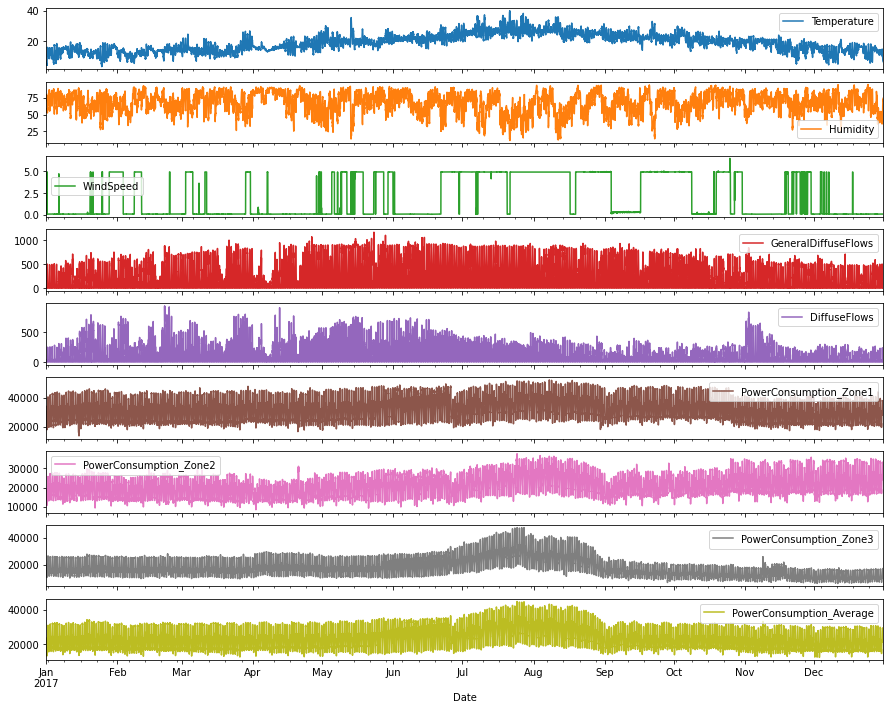

In [67]:
df.plot(subplots=True, figsize=(15, 12))

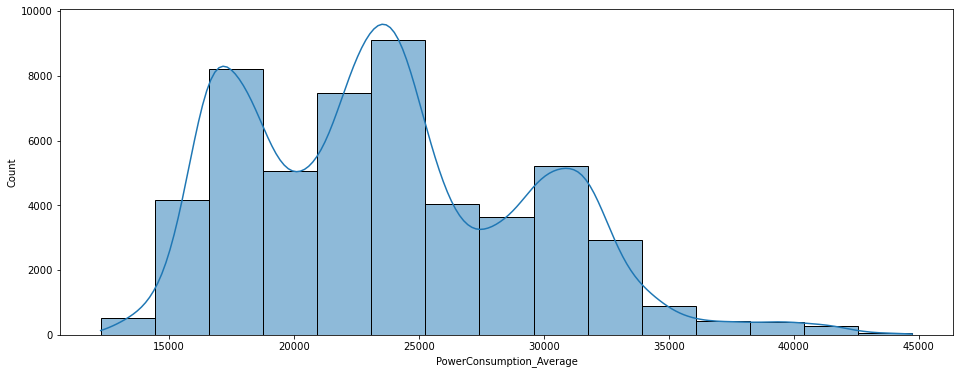

In [75]:
# Distribution of PowerConsumption target variable using the average of the 3 zones

df['PowerConsumption_Average'] = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2','PowerConsumption_Zone3']].mean(axis=1)

plt.figure(figsize=(16,6))
sns.histplot(data=df, x='PowerConsumption_Average', bins=15, kde=True)
plt.show()

array([<AxesSubplot:xlabel='Date'>], dtype=object)

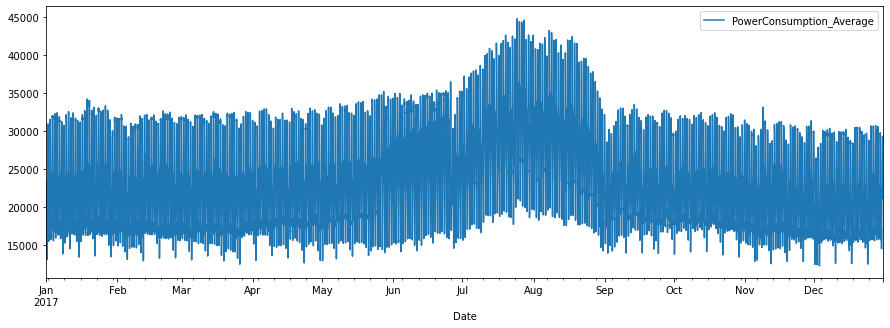

In [76]:
df.plot(y='PowerConsumption_Average',subplots=True, figsize=(15, 5))

Average power consumption over one day

array([<AxesSubplot:xlabel='Date'>], dtype=object)

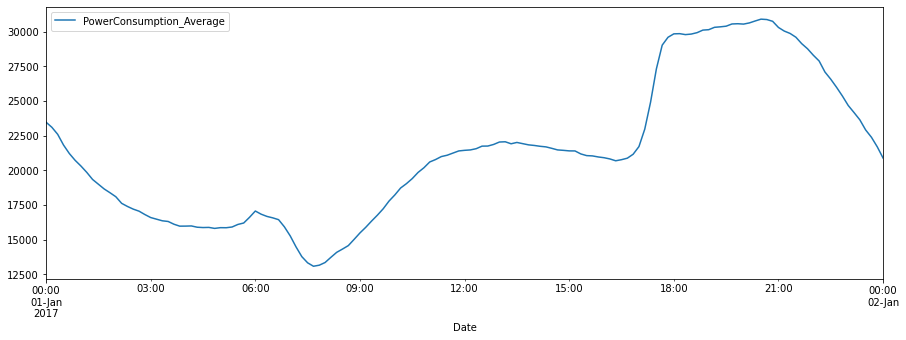

In [83]:
df['1/1/2017 0:00':'1/2/2017 0:00'].plot(y = 'PowerConsumption_Average',subplots=True, figsize=(15, 5))

# Hourly data

In [8]:
df_hourly=dfu.resample('H', on='Date').mean()

In [9]:
len(df_hourly)

8736

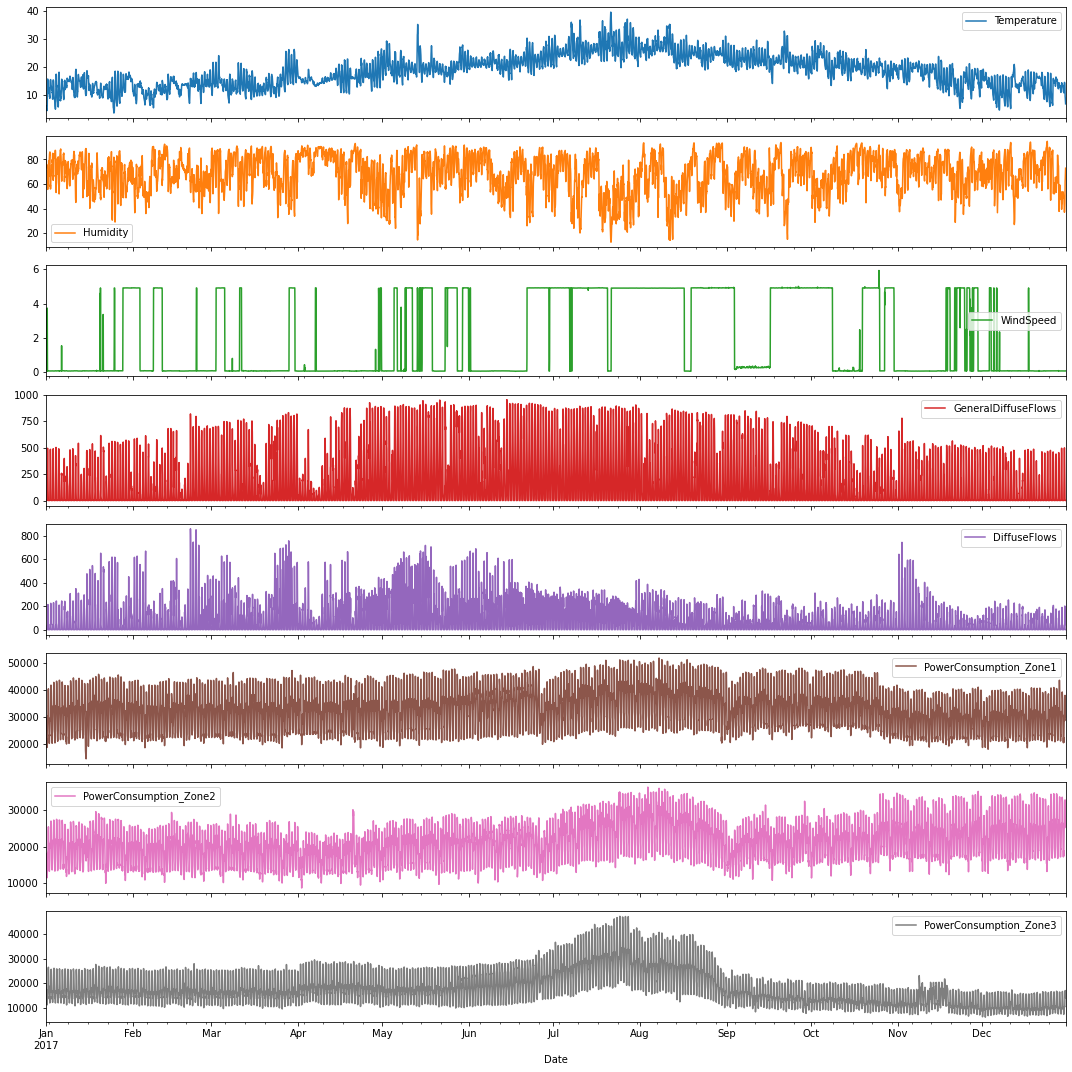

In [10]:
df_hourly.plot(subplots=True,figsize=(15,15))
plt.tight_layout()
plt.show()

# Daily data

In [11]:
df_daily=dfu.resample('24H', on='Date').mean()

In [12]:
len(df_daily)

364

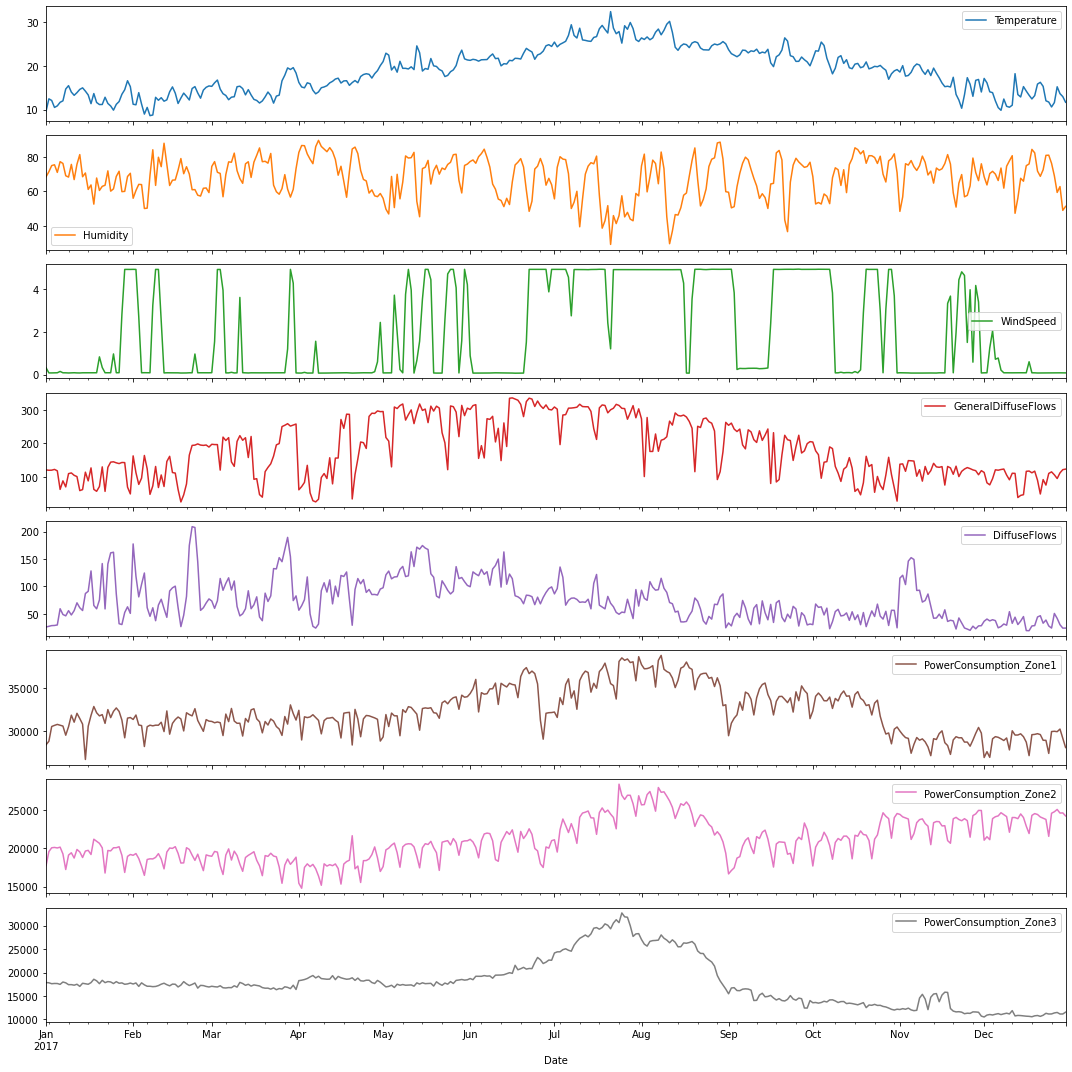

In [13]:
df_daily.plot(subplots=True,figsize=(15,15))
plt.tight_layout()
plt.show()

# Monthly data

In [15]:
df_Month=dfu.resample('M', on='Date').mean()

In [16]:
len(df_Month)

12

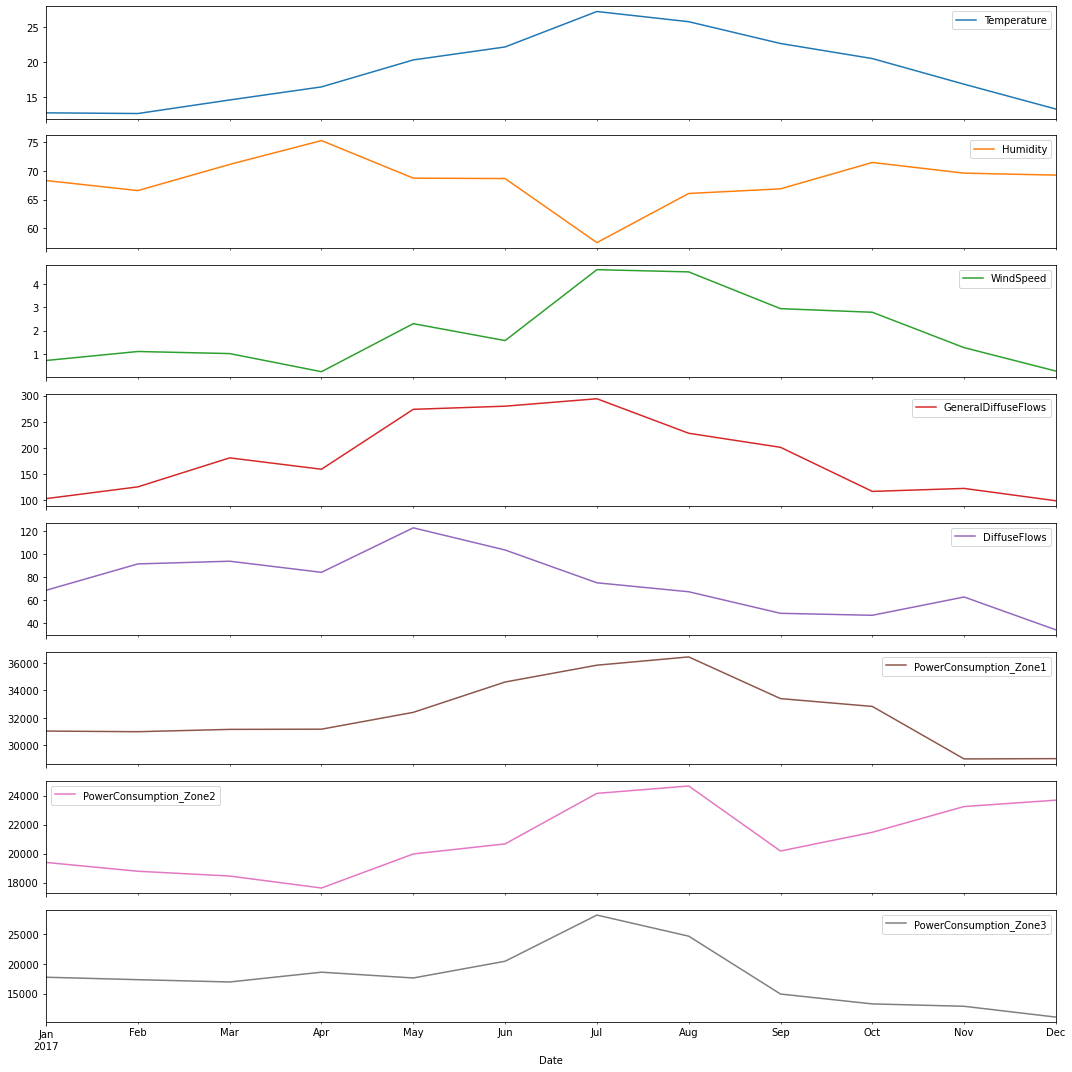

In [17]:
df_Month.plot(subplots=True,figsize=(15,15))
plt.tight_layout()
plt.show()